In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# import plot stylesheet and grab data
plt.style.use('apa.mplstyle')
df = pd.read_excel('MBD Graph Jewell SPED502 3.xlsx','PyData')

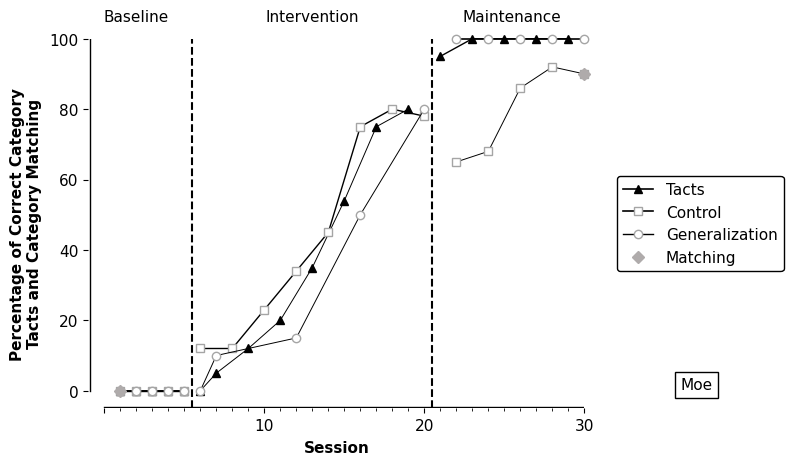

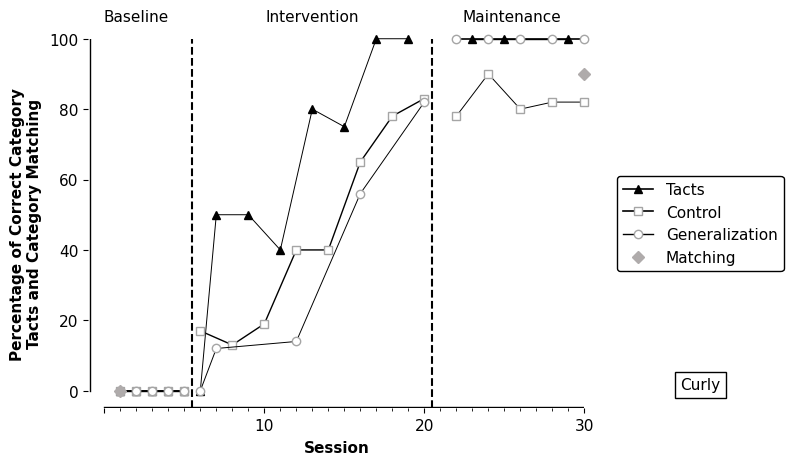

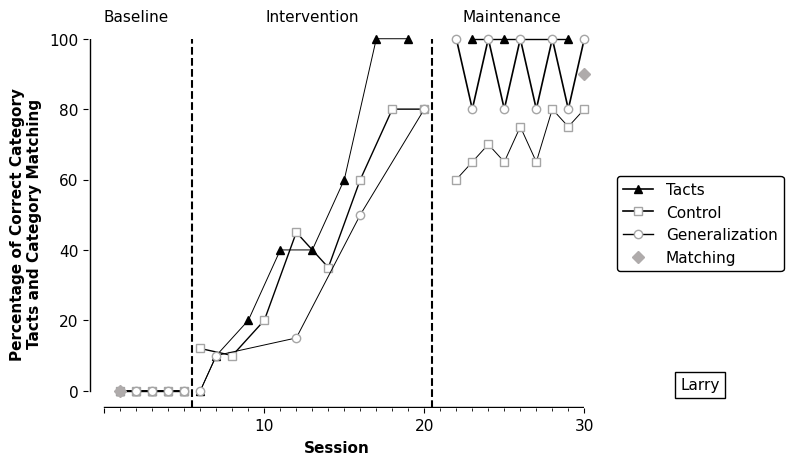

In [17]:
# create plots for each name in set
for name in df['Name'].unique():
    
    # get the subset df for that name
    globals()[f'df_{name}'] = df[df['Name'] == name]
    
    # split the df into one for each column that needs to be a line chart
    df_Tacts = globals()[f'df_{name}'][['Phases','Session','Tacts']].dropna()
    df_Control = globals()[f'df_{name}'][['Phases','Session','Control']].dropna()
    df_Generalization = globals()[f'df_{name}'][['Phases','Session','Generalization']].dropna()
    
    # for the columns that aren't lines we want to preserve NaNs, so use the top df
    x = globals()[f'df_{name}']['Session']
    y1 = globals()[f'df_{name}']['Matching']

    # create plot and add the bar and scatter
    plt.figure()

    # split the sub-dfs into phases for plotting each series
    for phase in globals()[f'df_{name}']['Phases'].unique():
        
        # now create the sub-dfs for each phase
        globals()[f'df_Tacts_{phase}'] = df_Tacts[df_Tacts['Phases']==phase]
        globals()[f'df_Control_{phase}'] = df_Control[df_Control['Phases']==phase]
        globals()[f'df_Generalization_{phase}'] = df_Generalization[df_Generalization['Phases']==phase]
        
        # create my x vars for each phase
        globals()['x_Tacts_%s' % phase] = globals()[f'df_Tacts_{phase}']['Session']
        globals()['x_Control_%s' % phase] = globals()[f'df_Control_{phase}']['Session']
        globals()['x_Generalization_%s' % phase] = globals()[f'df_Generalization_{phase}']['Session']
        
        # create my y vars for each phase
        globals()['y_Tacts_%s' % phase] = globals()[f'df_Tacts_{phase}']['Tacts']
        globals()['y_Control_%s' % phase] = globals()[f'df_Control_{phase}']['Control']
        globals()['y_Generalization_%s' % phase] = globals()[f'df_Generalization_{phase}']['Generalization']
        
        # now add these to the plot. Only keep the labels for the baseline so we aren't repeating
        if phase == 'Baseline':
            plt.plot(globals()['x_Tacts_%s' % phase], globals()['y_Tacts_%s' % phase], '^-', label = r'Tacts', color = '#000000', clip_on=False)
            plt.plot(globals()['x_Control_%s' % phase], globals()['y_Control_%s' % phase], 's-', label = r'Control', markerfacecolor='white', markeredgecolor='#A5A5A5'
                     , color='#000000', clip_on=False)
            plt.plot(globals()['x_Generalization_%s' % phase], globals()['y_Generalization_%s' % phase], 'o-', label = r'Generalization', markerfacecolor='white', markeredgecolor='#A5A5A5'
                     , color='#000000', clip_on=False)
        else:
            plt.plot(globals()['x_Tacts_%s' % phase], globals()['y_Tacts_%s' % phase], '^-', label = r'_Tacts', color = '#000000', clip_on=False)
            plt.plot(globals()['x_Control_%s' % phase], globals()['y_Control_%s' % phase], 's-', label = r'_Control', markerfacecolor='white', markeredgecolor='#A5A5A5'
                     , color='#000000', clip_on=False)
            plt.plot(globals()['x_Generalization_%s' % phase], globals()['y_Generalization_%s' % phase], 'o-', label = r'_Generalization', markerfacecolor='white', markeredgecolor='#A5A5A5'
                     , color='#000000', clip_on=False)
    
        # add headers to each phase. First find the x-coord for placement
        df_phasehead = globals()[f'df_{name}'][globals()[f'df_{name}']['Phases']==phase]
        min_session = df_phasehead['Session'].min()
        max_session = df_phasehead['Session'].max()
        if min_session == 1:
            x_head = (max_session - 1)/2.0
        else:
            x_head = (max_session + min_session)/2.0
        plt.text(x_head, 105, phase, fontsize=11, ha='center')

    plt.plot(x, y1, 'D', label = r'Matching', color = '#AFABAB', clip_on=False)
    
    # grab a list of the phases and when they change, then offset x by a half-step for plotting
    df_phases = globals()[f'df_{name}'][['Session','Phases']]
    df_phasechange = df_phases.groupby(['Phases']).max()
    df_phasechange['change'] = df_phasechange['Session'] + 0.5
    
    # plot the phase changes
    for change in df_phasechange['change']:
        # don't plot the last one because it's not a change, it's just the end of the df
        if change != df_phases['Session'].max() + 0.5:
            plt.axvline(x=change, linestyle='--')
    
    # label axes
    plt.xlabel('Session', fontsize=11)
    plt.ylabel('Percentage of Correct Category\nTacts and Category Matching', fontsize=11)
    
    # set axis details
    ax = plt.gca()
    ax.set_xlim([-1, df_phases['Session'].max()])
    ax.set_ylim([-5, 100])
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.set_xticks(np.arange(0, df_phases['Session'].max() + 1, 10))
    ax.set_xticks(np.arange(0, df_phases['Session'].max() + 1, 1), minor=True)
    xticks = ax.xaxis.get_major_ticks() 
    xticks[0].label1.set_visible(False)
    
    # hide the real axes and draw some lines instead, this gives us the corner gap
    ax.spines['left'].set_color('none')
    ax.plot([-0.9, -0.9], [0, 100], '-', color='black', lw=1)  
    
    ax.spines['bottom'].set_color('none')
    ax.plot([0, 30], [-4.75, -4.75], '-', color='black', lw=1)  
    
    # add legend and name box
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), edgecolor='black', framealpha=1, fontsize=11)
    plt.text(1.05, 0.15, name, fontsize=11, transform=plt.gcf().transFigure, bbox={'facecolor':'white'})

    # Save the plot as an image
    plt.savefig(name + '_intervention_chart.png', dpi=300, bbox_inches='tight')
    
    # display the plot, then wipe it so we can start again
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()